In [1]:
import pandas as pd
import numpy as np

In [2]:
ch1 = pd.read_csv("CH1.csv")
ch2 = pd.read_csv("CH2.csv")
ch3 = pd.read_csv("CH3.csv")
ch4 = pd.read_csv("CH4.csv")

ch1_X = ch1.select_dtypes(exclude = ["int64", "object"]).copy()
ch2_X = ch2.select_dtypes(exclude = ["int64", "object"]).copy()
ch3_X = ch3.select_dtypes(exclude = ["int64", "object"]).copy()
ch4_X = ch4.select_dtypes(exclude = ["int64", "object"]).copy()

ch1_X.drop(["0"], axis = 1, inplace = True)
ch2_X.drop(["0"], axis = 1, inplace = True)
ch3_X.drop(["0"], axis = 1, inplace = True)
ch4_X.drop(["0"], axis = 1, inplace = True)

In [3]:
def getIndicesToBeRemoved(data):
    fft = data.select_dtypes("float64").T

    indices = np.where(np.max(fft, axis = 0) == np.inf)[0]
    indices = np.concatenate((indices, np.where(data.isna().any(axis = 1))[0]))

    return indices

In [4]:
data = pd.concat([ch1_X, ch2_X, ch3_X, ch4_X], axis = 1)
i = getIndicesToBeRemoved(data)

In [5]:
Y = ch1_X.drop(list(set(i))).reset_index(drop=True)

ch2_X = ch2_X.drop(list(set(i))).reset_index(drop=True)
ch3_X = ch3_X.drop(list(set(i))).reset_index(drop=True)
ch4_X = ch4_X.drop(list(set(i))).reset_index(drop=True)

(array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
         22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
         33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
         44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,
         55,   56,   57,   58,   59,   60,   61,   62,   63,   64,   65,
         66,   67,   68,   69,   70,   71,   72,   73,   74,   75,   76,
         77,   78,   79,   80,   81,   82,   83,   84,   85,   86,   87,
         88,   89,   90,   91,   92,   93,   94,   95,   96,   97,   98,
         99,  100,  101,  102,  103,  104,  105,  106,  107,  108,  109,
        110,  111,  112,  113,  114,  115,  116,  117,  118,  119,  120,
        121,  122,  123,  124,  125,  126,  127,  128,  129,  130,  131,
        132,  133,  134,  135,  136,  137,  138,  139,  140,  141,  142,
        143,  144,  145,  146,  147,  148,  149,  

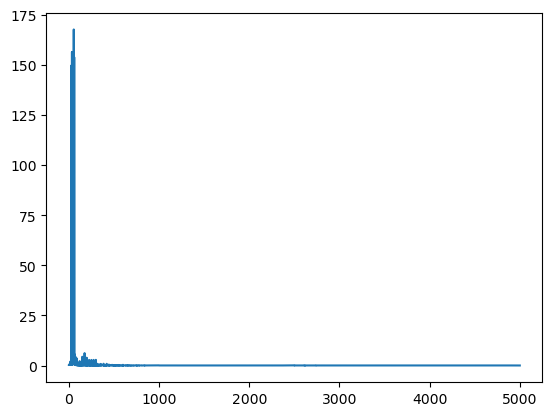

In [28]:
import matplotlib.pyplot as plt
summation = np.reshape(np.array(np.sum(ch3_X, axis = 0)), (-1,))
print(np.where(summation > 0.1))
plt.plot(summation)